In [6]:
# Import library
import noisereduce as nr
import librosa
import soundfile as sf
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [29]:
# Load audio file
file_list=["/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/HF_ANALOG.wav",
           "/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/VHF_ANALOG.wav",
           "/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/VHF_VOIP.wav",
           "/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/VOIP telephone.wav"]


# # Perform noise reduction
# reduced_noise = nr.reduce_noise(y=y, sr=sr)

# # Save the noise reduced audio
# sf.write("reduced_noise_output.wav", reduced_noise, sr)

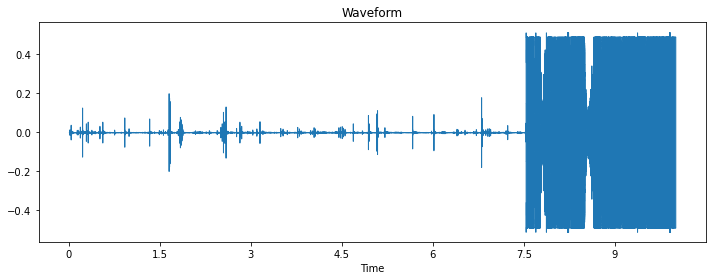

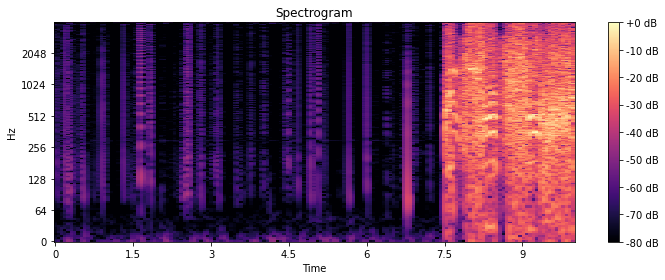

In [30]:
# HF_ANALOG
y, sr = librosa.load(file_list[0], sr=None)
# Plotting the waveform of HF_ANALOG
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.tight_layout()
plt.show()

# Plotting the spectrogram HF_ANALOG
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

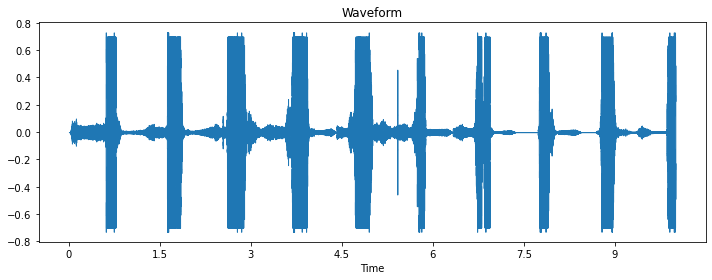

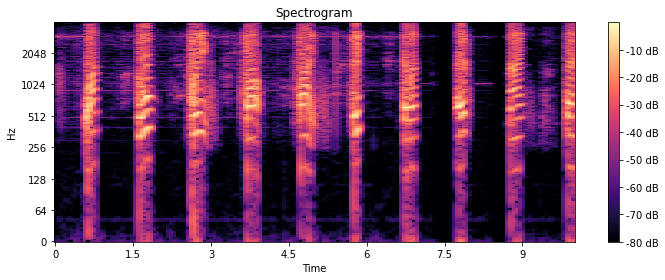

In [31]:
# VHF_ANALOG
y, sr = librosa.load(file_list[1], sr=None)

# Plotting the waveform VHF_ANALOG
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.tight_layout()
plt.show()

# Plotting the spectrogram VHF_ANALOG
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

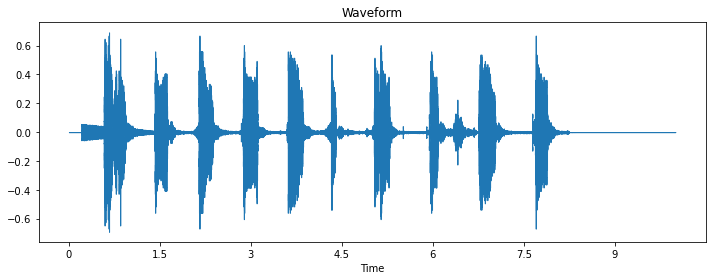

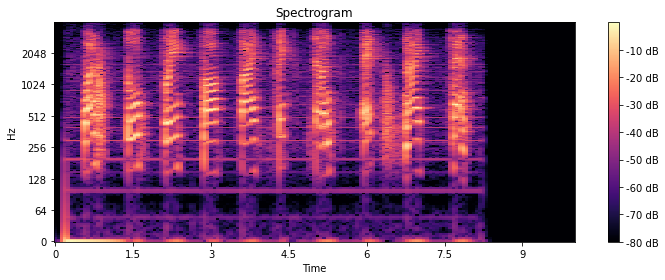

In [32]:
# VHF_VOIP
y, sr = librosa.load(file_list[2], sr=None)

# Plotting the waveform of VHF_VOIP
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.tight_layout()
plt.show()

# Plotting the spectrogram VHF_VOIP
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

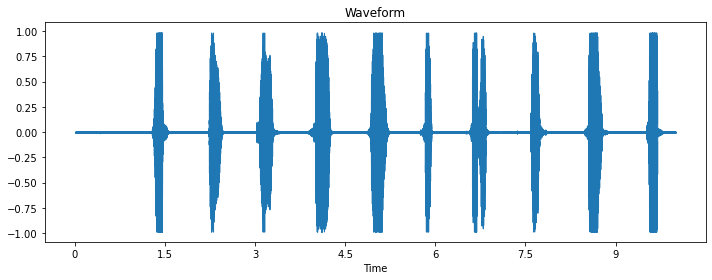

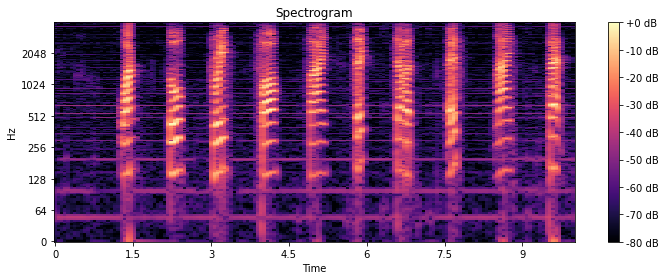

In [33]:
# VOIP Telephone
y, sr = librosa.load(file_list[3], sr=None)

# Plotting the waveform of VOIP Telephone
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.tight_layout()
plt.show()

# Plotting the spectrogram VOID Telephone
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

In [36]:
def cut_to_duration(audio_file_path, output_file_path, duration_seconds=10):
    """
    Cuts the audio file to the specified duration (in seconds).
    
    Parameters:
    - audio_file_path (str): Path to the input audio file.
    - output_file_path (str): Path to save the truncated audio file.
    - duration_seconds (float, optional): Desired duration in seconds. Default is 10 seconds.
    
    Returns:
    None
    """
    
    # Load the audio file
    y, sr = librosa.load(audio_file_path, sr=None)
    
    # Calculate the desired length in samples
    desired_length = sr * duration_seconds
    
    # If the audio is longer than the desired length, truncate it
    if len(y) > desired_length:
        y = y[:desired_length]
    
    # Save the truncated or original audio to the output path
    sf.write(output_file_path, y, sr)

for file in file_list:
    cut_to_duration(file,file)

In [56]:
def np_arr(X_train, X_test, y_train, y_test):
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)


    X_train = X_train.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    
    return X_train, X_test, y_train, y_test


In [74]:
# Extract functio
def extract_features(audio_file, max_padding):
    y, sr = librosa.load(audio_file, mono=True, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    # Pad the MFCCs if they are shorter than the maximum length
    pad_width = max_padding - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
    return mfccs

# First, determine the maximum length (number of columns) among the MFCCs
max_length = -1
all_files = noise_files + clean_files
for file in all_files:
    y, sr = librosa.load(file, mono=True, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    if mfccs.shape[1] > max_length:
        max_length = mfccs.shape[1]

# Example data loading (you might want to change this to your data paths)
noise_files = ['/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/HF_ANALOG.wav', 
               '/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/VHF_ANALOG.wav']
clean_files = ['/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/VHF_VOIP.wav',
               '/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/VOIP telephone.wav']
X = []
Y = []

for file in noise_files:
    features = extract_features(file,max_length)
    X.append(features)
    Y.append(1)  # 1 for noise


for file in clean_files:
    features = extract_features(file,max_length)
    X.append(features)
    Y.append(0)  # 0 for clean


model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test = np_arr(X_train, X_test, y_train, y_test)
if len(X_train) > len(y_train):
    X_train = X_train[:len(y_train)]
elif len(y_train) > len(X_train):
    y_train = y_train[:len(X_train)]

if len(X_test) > len(y_test):
    X_test = X_test[:len(y_test)]
elif len(y_test) > len(X_test):
    y_test = y_test[:len(X_test)]

model.fit(X_train, y_train)
print("Frequency Score: ", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Frequency Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
